<a href="https://colab.research.google.com/github/HBiermann/FCC_ML/blob/main/Book%20Recommendation%20Engine%20using%20KNN/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-06-13 18:28:09--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  85.1MB/s    in 0.3s    

2025-06-13 18:28:10 (85.1 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
# add your code here - consider creating a new cell for each section of code

In [5]:
df_books.tail()

,isbn,title,author
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle


In [6]:
df_ratings.tail()

,user,isbn,rating
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0
1149779,276723,05162443314,8.0


In [24]:
# Count values
counts_users = df_ratings.user.value_counts()
counts_users_to_keep = counts_users[counts_users>200]

counts_books = df_ratings.isbn.value_counts()
counts_books_to_keep = counts_books[counts_books>100]


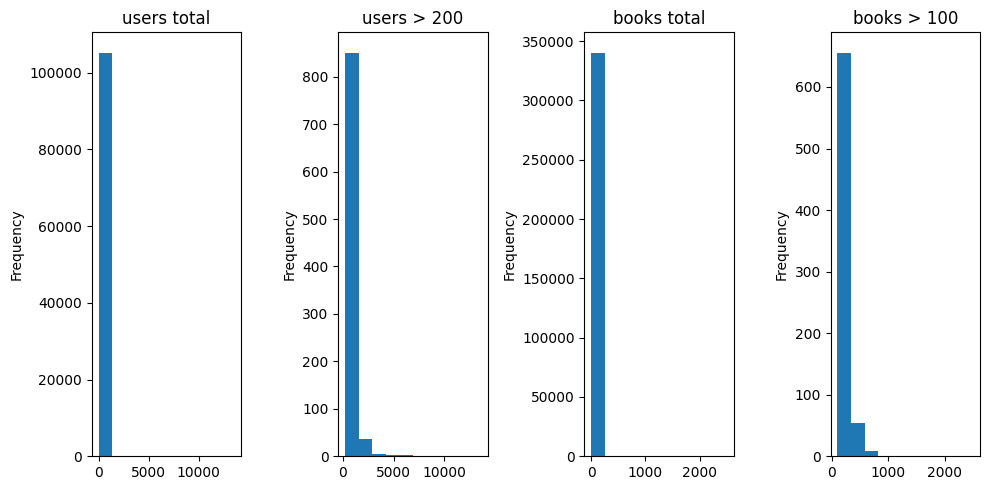

In [25]:
# Visualise
plt.figure(figsize=(10,5))
plt.subplot(1, 4, 1)
counts_users.plot(kind='hist')
plt.title('users total')

plt.subplot(1,4,2)
counts_users_to_keep.plot(kind='hist')
plt.title('users > 200')


plt.subplot(1, 4, 3)
counts_books.plot(kind='hist')
plt.title('books total')

plt.subplot(1,4,4)
counts_books_to_keep.plot(kind='hist')
plt.title('books > 100')

plt.tight_layout()

In [8]:
data_ratings_filtered = df_ratings[df_ratings.user.isin(counts_users_to_keep.index)]
data_ratings = data_ratings_filtered[data_ratings_filtered.isbn.isin(counts_books_to_keep.index)]
print('df_ratings', df_ratings.shape)
print('ratings filtered', data_ratings_filtered.shape)
print('ratings final', data_ratings.shape)

data_books = df_books[df_books.isbn.isin(data_ratings.isbn)]
print('df_books unique', df_books.isbn.unique().shape)
print('df_ratings unique', df_ratings.isbn.unique().shape)
print('unique books final', data_books.shape)
print('unique ratings final', data_ratings.shape)


df_ratings (1149780, 3)
ratings filtered (526356, 3)
ratings final (49254, 3)
df_books unique (271379,)
df_ratings unique (340556,)
unique books final (717, 3)
unique ratings final (49254, 3)


In [42]:
df_ratings = data_ratings.set_index('isbn')
df_ratings = df_ratings.pivot_table(
    index= 'isbn',
    columns= 'user',
    values= 'rating'
).fillna(0)
df_ratings.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
def get_isbn(title=""):
  return data_books.loc[data_books.title == test_title, 'isbn'].values

def get_title(isbn=""):
  return data_books.loc[data_books.isbn == isbn, 'title'].values

array(['The Queen of the Damned (Vampire Chronicles (Paperback))'],
      dtype=object)

In [10]:
def convert_title(title = ""):
  title = title.lower().split()
  title = [s.strip('()/:') for s in title]
  return title

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
0345351525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# KNN
knn = NearestNeighbors()

In [61]:
test_title = "The Queen of the Damned (Vampire Chronicles (Paperback))"
something = get_isbn(test_title)
print(df_ratings.loc[something])

def matricize(data):
  docs = [(convert_title(title)) for title in data]
  indptr = [0]
  indices = []
  data = []
  vocabulary = {}
  for d in docs:
      for term in d:
          index = vocabulary.setdefault(term, len(vocabulary))
          indices.append(index)
          data.append(1)
      indptr.append(len(indices))

  mat = csr_matrix((data, indices, indptr), dtype=int).toarray()
  return mat
mat = matricize(data_books.title.values)

user        254     2276    2766    2977    3363    4017    4385    6242    \
isbn                                                                         
0345351525     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user        6251    6323    ...  274004  274061  274301  274308  274808  \
isbn                        ...                                           
0345351525     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

user        275970  277427  277478  277639  278418  
isbn                                                
0345351525     0.0     0.0     0.0     0.0     0.0  

[1 rows x 882 columns]


In [87]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  book_isbn = get_isbn(book)
  knn.fit(df_ratings)
  recommended_books = knn.kneighbors(df_ratings.loc[book_isbn], 5, return_distance=True)

  return recommended_books

test_title = "The Queen of the Damned (Vampire Chronicles (Paperback))"
get_recommends(test_title)

(array([[ 0.        , 35.29872513, 35.74912643, 36.09709167, 36.33180237]]),
 array([[134, 382, 548, 477, 136]]))

In [14]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

(array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.        , 0.        , 0.        , 1.41421356, 1.41421356],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.41421356, 1.41421356],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.41421356, 1.41421356, 1.41421356],
       [0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356],
       [0.        , 0.        , 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()